<a href="https://colab.research.google.com/github/vamshi2011/sentiment-analysis-with-sentiment-given-/blob/main/Copy_of_sentiment_analysis_internzlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
from sklearn.naive_bayes import MultinomialNB
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
df = pd.read_csv("/content/training.csv", encoding='latin-1')
df = pd.DataFrame(df)

In [ ]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df = df.drop(["id of the tweet", "date of the tweet", "query", "user"], axis=1)

In [ ]:
df.head()

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df.columns

Index(['polarity of tweet ', 'text of the tweet '], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 2 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   text of the tweet   1048572 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.shape

(1048572, 2)

In [ ]:
df["polarity of tweet"].value_counts()

,count
polarity of tweet,
0,799996
4,248576


In [ ]:
negative_df = df[df['polarity of tweet'] == 0]
positive_df = df[df['polarity of tweet'] == 4]

negative_sample = negative_df.sample(n=50000, random_state=42)
positive_sample = positive_df.sample(n=50000, random_state=42)

balanced_df = pd.concat([negative_sample, positive_sample])

df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()

    words = text.split()

    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words("english"))]

    return " ".join(words)

df['cleaned_text'] = df['text of the tweet'].apply(preprocess_text)

In [ ]:
df.to_csv("/content/cleaned_data.csv", index=False)

In [ ]:
df = df.drop(["text of the tweet"], axis=1)

In [ ]:
df.head()

,polarity of tweet,cleaned_text
0,4,tight jean double makin go whistle loll oh awe...
1,4,shower feel refreshing long day fair
2,0,mmmm homemade potato leek soup wish merivale l...
3,4,happy last picture already twitter
4,4,awh great morning run morning everyone


In [ ]:
X = df["cleaned_text"]
y = df["polarity of tweet"]

In [ ]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(X).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = MultinomialNB().fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 4, 4, 0])

Classification_report               precision    recall  f1-score   support

           0       0.74      0.74      0.74     10013
           4       0.74      0.74      0.74      9987

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000

Accuracy 0.7415
Precision 0.7400578092295426
Recall 0.743466506458396
F1 Score 0.7417582417582418


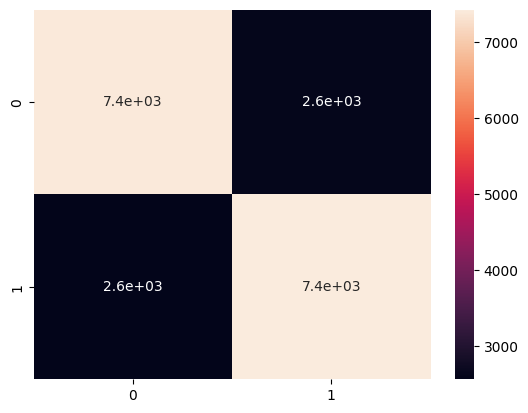

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print("Classification_report",classification_report(y_test, y_pred))
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred, pos_label=4))
print("Recall",recall_score(y_test, y_pred, pos_label=4))
print("F1 Score",f1_score(y_test, y_pred, pos_label=4))

In [ ]:
inp_text = input("Enter some text to check the sentiment:")
inp_text = preprocess_text(inp_text)
inp_text = cv.transform([inp_text]).toarray()

Enter some text to check the sentiment:it was really a bad day today


In [ ]:
out_text = model.predict(inp_text)
if out_text == 0:
  print("Negative")
else:
  print("Positive")

Negative
